# Fraud Prediction

Classification is one of the most widely used techniques in machine learning, with a broad array of
applications, including sentiment analysis, ad targeting, spam detection, risk assessment, medical
diagnosis and image classification. The core goal of classification is to predict a category or class y from
some inputs x. As part of this project I'll be analyzing the fraud cases on a arbitary dataset and build multiple models based on the evaluation metrics.

In [1]:
#libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

## Loading the Data

In [2]:
df= pd.read_csv('fraud_data.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


As the data consist of predictor variables which are already normalized and pre-processed for consumption we will be removing the pre-processing steps to the model building process. In this section, we define our features and target variable and then we split our data set into train and test sets. Our features inclues v1,...v28 as well as time since the customer has last visited the platform or product. Our target is class. 

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

Analyzing the distribution of the class we see there is vast difference in the counts of customer fraud and customers who are not fraud. This kind of distribution is quite common in such scenarios wherein we are targetiing towards predicting a class which occurs rarely.

In [5]:
bincount = np.bincount(y)
pd.DataFrame({'Not Fraud':bincount[0],'Fraud':bincount[1]},index=[1])

,Fraud,Not Fraud
1,492,284315


As the distribution of class is not even, we will be defining a stratified samples with equal distribution of class using scikit learn which will give us equal percentage of each class in our test and training data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify = y)

### Model Building

### K-Nearest Neighbor

#### 1. Parameter Tuning

Lets tune our mode to find the best parameters i.e. the nmber of nearest neighbors for or knn model.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=3,random_state= 1, shuffle= True)
scores = ['accuracy', 'precision', 'recall']
tuning_parameters = {'n_neighbors':np.arange(1,21)}
dict = {}
for score in scores:    
    print(score)
    clf = GridSearchCV(KNeighborsClassifier(), tuning_parameters, cv=skf,
                           scoring=scores, refit=score, error_score =0, n_jobs=8, pre_dispatch = 8,verbose = True)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    dict[score]=clf.best_params_

accuracy
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  4.5min finished


{'n_neighbors': 2}
precision
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  4.5min finished


{'n_neighbors': 10}
recall
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  4.5min finished


{'n_neighbors': 1}


#### 2. Score Comparison with different Parameter

Based on our tuning we found multiple parameter for best performance in respective scores. As we are targeting better predictions towards finding the fraud cases we will be looking at the recall scores to be higher. We will build our model based on the best parameter suited towards finding the best recall.

In [9]:
clf = GridSearchCV(KNeighborsClassifier(), tuning_parameters, cv=skf,
                           scoring=scores, refit='recall', error_score =0, n_jobs=8, pre_dispatch = 8,verbose = True)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  4.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
       error_score=0,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch=8, refit='recall', return_train_score='warn',
       scoring=['accuracy', 'precision', 'recall'], verbose=True)

In [10]:
from sklearn.metrics import confusion_matrix

knn_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, knn_predicted)

print('KNN Classifier\n', confusion)

KNN Classifier
 [[71048    31]
 [   99    24]]


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, knn_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, knn_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, knn_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, knn_predicted)))

Accuracy: 1.00
Precision: 0.44
Recall: 0.20
F1: 0.27


In [12]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.44      0.20      0.27       123

avg / total       1.00      1.00      1.00     71202



### Logistic Regression

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).

#### 1. Parameter Tuning

As there is 2 parameter to be tuned in the process we will be using regularization as the prameter tuning stage to find the optimal result for varied scoring measures.

In [13]:
from sklearn.linear_model import LogisticRegression

dict_log={}
tuning_params_log = {'penalty':['l1','l2'],'C':[1,10,50,100]}
for score in scores:    
    print(score)
    clf = GridSearchCV(LogisticRegression(), tuning_params_log, cv=skf,
                           scoring=scores, refit=score, error_score =0, n_jobs=8, pre_dispatch = 8,verbose = True)
    clf.fit(X_train, y_train)
    print(clf.best_params_)
    dict_log[score]=clf.best_params_

accuracy
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:   48.2s finished


{'C': 10, 'penalty': 'l1'}
precision
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:   44.5s finished


{'C': 1, 'penalty': 'l1'}
recall
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:   48.5s finished


{'C': 10, 'penalty': 'l1'}


In [14]:
dict_log

{'accuracy': {'C': 10, 'penalty': 'l1'},
 'precision': {'C': 1, 'penalty': 'l1'},
 'recall': {'C': 10, 'penalty': 'l1'}}

#### 2. Score Comparison with different parameters

In [15]:
tuning_params_log = {'penalty':['l1','l2'],'C':[1,10,50,100]}

clf = GridSearchCV(LogisticRegression(), tuning_params_log, cv=skf,
                           scoring=scores, refit='recall', error_score =0, n_jobs=8, pre_dispatch = 8,verbose = True)
clf.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:   47.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
       error_score=0,
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'C': [1, 10, 50, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch=8, refit='recall', return_train_score='warn',
       scoring=['accuracy', 'precision', 'recall'], verbose=True)

In [16]:
from sklearn.metrics import confusion_matrix

log_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, log_predicted)

print('Logistic Regression Classifier\n', confusion)

Logistic Regression Classifier
 [[71070     9]
 [   36    87]]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, log_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, log_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, log_predicted)))

Accuracy: 1.00
Precision: 0.91
Recall: 0.71
F1: 0.79


In [18]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, log_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.91      0.71      0.79       123

avg / total       1.00      1.00      1.00     71202



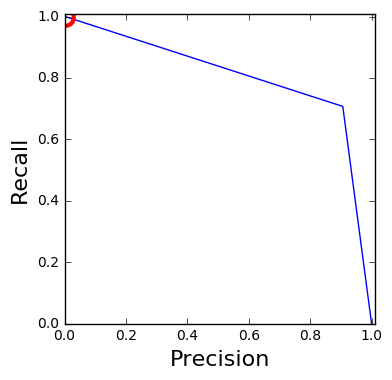

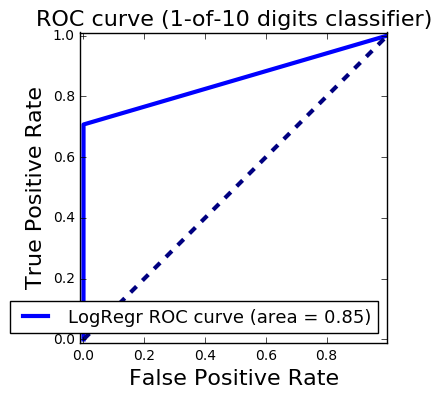

In [19]:
from sklearn.metrics import precision_recall_curve,roc_curve,auc
best_param = dict_log['recall']
lr = LogisticRegression(penalty=best_param['penalty'],C=best_param['C']).fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, lr_predicted)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_predicted)

closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### Naive Bayes

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. It is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable

In [20]:
from sklearn.naive_bayes import GaussianNB 

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_train)

# calculate accuracy score
clf.score(X_test, y_test)

# calculate precision and recall score

precision = precision_score(y_train, y_pred2, average='binary')
recall = recall_score(y_train, y_pred2, average='binary')

print('Naive Bayes Classifer Score: \n') 
print(clf.score(X_test, y_test))
print('Naive Bayes Classifer precision :\n')
print(precision)
print('Naive Bayes Classifer recall: \n')
print(recall)

# generate confusion matrix

cm = confusion_matrix(y_train,y_pred2)

df_cm = pd.DataFrame(cm, index = ['True (positive)', 'True (negative)'])
df_cm.columns = ['Predicted (positive)', 'Predicted (negative)']
sns.heatmap(df_cm, annot=True, fmt="d")
print(df_cm)

Naive Bayes Classifer Score: 

0.992556388865
Naive Bayes Classifer precision :

0.137910447761
Naive Bayes Classifer recall: 

0.626016260163
                 Predicted (positive)  Predicted (negative)
True (positive)                211792                  1444
True (negative)                   138                   231


### Decision Tree

Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). It is one of the predictive modelling approaches used in statistics, data mining and machine learning.

#### 1. Parameter Tuning

As Decision tree has multiple parameter based on the leafs and depth we can tune our models to specifics so that we can get the maximum score. As we have limited resources we have tuned it on the maximum depth of the tree.

In [21]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier


skf = StratifiedKFold(n_splits =3, random_state = 1,shuffle =True)
tuning_param = {'max_depth':np.arange(1,11)}

clf = GridSearchCV(DecisionTreeClassifier(),param_grid=tuning_param,cv=skf,n_jobs=9,verbose=True,error_score=0,refit='recall')
clf.fit(X_train,y_train)
clf.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=9)]: Done  30 out of  30 | elapsed:   40.3s finished


{'max_depth': 5}

#### 2. Score Comparison

Based on the best parameter derived from the GredSearchCV we are calculating and comparing the various evaluation metrics.

In [22]:
from sklearn.metrics import confusion_matrix

tree_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 5)\n', confusion)

Decision tree classifier (max_depth = 5)
 [[71069    10]
 [   17   106]]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 1.00
Precision: 0.91
Recall: 0.86
F1: 0.89


In [24]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.91      0.86      0.89       123

avg / total       1.00      1.00      1.00     71202



### Support Vector Machine

Support vector machines (SVM's, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

#### 1. Linear Support Vector Machine

In [25]:
from sklearn.svm import LinearSVC
skf = StratifiedKFold(n_splits=3,random_state= 1, shuffle= True)
scores = ['accuracy', 'precision', 'recall']

tuning_param_svm_lin = [
  {'C': [1, 10, 20, 30], 'penalty': ['l1','l2']}
 ]

dict = {}
 
print('Recall')
clf = GridSearchCV(LinearSVC(), tuning_param_svm_lin, cv=skf,
                       scoring=scores, refit='recall', error_score =0, n_jobs=8, pre_dispatch = 8,verbose = True)
clf.fit(X_train, y_train)
print(clf.best_params_)

Recall
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:  1.6min finished


{'C': 10, 'penalty': 'l2'}


In [26]:
from sklearn.metrics import confusion_matrix

svm_predicted_mc = clf.predict(X_test)
confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
print(confusion_mc)

[[71079     0]
 [  114     9]]


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, svm_predicted_mc)))
print('Precision: {:.2f}'.format(precision_score(y_test, svm_predicted_mc)))
print('Recall: {:.2f}'.format(recall_score(y_test,svm_predicted_mc)))
print('F1: {:.2f}'.format(f1_score(y_test, svm_predicted_mc)))

Accuracy: 1.00
Precision: 1.00
Recall: 0.07
F1: 0.14


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_predicted_mc, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       1.00      0.07      0.14       123

avg / total       1.00      1.00      1.00     71202



#### 2. Kernel Support Vector Machine

Due to lack of resources we were aunable to tune the kernalised support vector machine. We have run a auto-parameterised model to check the evaluation metric.

In [7]:
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=3,random_state= 1, shuffle= True)
 
print('Recall')
clf = SVC(C=1.0, kernel='rbf', gamma='auto', cache_size=200, verbose=True, random_state=1, max_iter=400)
clf.fit(X_train, y_train)

Recall
[LibSVM]

C:\Users\fxf150430\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=400, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=True)

In [8]:
from sklearn.metrics import confusion_matrix

svm_predicted_rbf = clf.predict(X_test)
confusion_mc = confusion_matrix(y_test, svm_predicted_rbf)
print(confusion_mc)

[[71079     0]
 [  116     7]]


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, svm_predicted_rbf)))
print('Precision: {:.2f}'.format(precision_score(y_test, svm_predicted_rbf)))
print('Recall: {:.2f}'.format(recall_score(y_test,svm_predicted_rbf)))
print('F1: {:.2f}'.format(f1_score(y_test, svm_predicted_rbf)))

Accuracy: 1.00
Precision: 1.00
Recall: 0.06
F1: 0.11


In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_predicted_rbf, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       1.00      0.06      0.11       123

avg / total       1.00      1.00      1.00     71202



### Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV

skf = StratifiedKFold(n_splits =3, random_state = 1,shuffle =True)

tuning_param = {'max_leaf_nodes':[25,30,35],'max_depth':[4,5,6]}

clf = GridSearchCV(RandomForestClassifier(),param_grid=tuning_param,cv=skf,
                   n_jobs=9,verbose=True,error_score=0,refit='recall')
clf.fit(X_train,y_train)
clf.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=9)]: Done  27 out of  27 | elapsed:   43.8s finished


{'max_depth': 6, 'max_leaf_nodes': 35}

In [8]:
from sklearn.metrics import confusion_matrix

rfc_predicted = clf.predict(X_test)
confusion_mc = confusion_matrix(y_test, rfc_predicted)
print(confusion_mc)

[[71071     8]
 [   19   104]]


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rfc_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, rfc_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test,rfc_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, rfc_predicted)))

Accuracy: 1.00
Precision: 0.93
Recall: 0.85
F1: 0.89


In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc_predicted, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.93      0.85      0.89       123

avg / total       1.00      1.00      1.00     71202



##  Ensemble

In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. Unlike a statistical ensemble in statistical mechanics, which is usually infinite, a machine learning ensemble consists of only a concrete finite set of alternative models, but typically allows for much more flexible structure to exist among those alternatives.

### Hard Voting

The following code creates and train a voting classifier in Scikit Learn composed of an ensemble classifier which uses predicted class labels for majority rule voting.

In [7]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [29]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(max_depth= 6, max_leaf_nodes= 30, random_state=42)
svm_clf = SVC(random_state=42,kernel='linear')

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard',n_jobs=-1)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...r',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=-1, voting='hard', weights=None)

In [30]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    confusion = confusion_matrix(y_test, y_pred)
    print(clf.__class__.__name__,'\n', confusion)
    print(classification_report(y_test, y_pred, target_names=['not 1', '1']))

LogisticRegression 0.999199460689
LogisticRegression 
 [[71065    14]
 [   43    80]]
RandomForestClassifier 0.999705064464
RandomForestClassifier 
 [[71074     5]
 [   16   107]]
SVC 0.998735990562
SVC 
 [[71065    14]
 [   76    47]]
VotingClassifier 0.999325861633
VotingClassifier 
 [[71070     9]
 [   39    84]]


### Soft Voting

The following code creates and train a voting classifier in Scikit Learn composed of an ensemble classifier which predicts the class label based on the argmax of the sums of the predicted probabilities.

In [8]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(max_depth= 6, max_leaf_nodes= 30, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf)], voting='soft',n_jobs=8)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=8, voting='soft', weights=None)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

for clf in (log_clf, rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    confusion = confusion_matrix(y_test, y_pred)
    print(clf.__class__.__name__,'\n', confusion)
    print(classification_report(y_test, y_pred, target_names=['not 1', '1']))

LogisticRegression 0.999199460689
LogisticRegression 
 [[71065    14]
 [   43    80]]
             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.85      0.65      0.74       123

avg / total       1.00      1.00      1.00     71202

RandomForestClassifier 0.999705064464
RandomForestClassifier 
 [[71074     5]
 [   16   107]]
             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.96      0.87      0.91       123

avg / total       1.00      1.00      1.00     71202

VotingClassifier 0.999438218028
VotingClassifier 
 [[71072     7]
 [   33    90]]
             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.93      0.73      0.82       123

avg / total       1.00      1.00      1.00     71202



### Bagging

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator, by introducing randomization into its construction procedure and then making an ensemble out of it.

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 5, random_state=1), 
                            n_estimators=500,  bootstrap=True, n_jobs=-1, random_state=1, verbose = True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  7.6min remaining: 22.7min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  7.8min finished
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    3.6s remaining:   10.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    6.3s finished


In [16]:
confusion = confusion_matrix(y_test, y_pred)

print('Bagging classifier\n', confusion)

Bagging classifier
 [[71071     8]
 [   16   107]]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 1.00
Precision: 0.93
Recall: 0.87
F1: 0.90


In [ ]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.93      0.87      0.90       123

avg / total       1.00      1.00      1.00     71202



### Pasting

When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting.

In [17]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 5, random_state=1),
                            n_estimators=500,  bootstrap=False, n_jobs=-1, random_state=1, verbose = True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed: 19.3min remaining: 19.3min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed: 19.4min finished
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    6.8s remaining:    6.8s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    7.6s finished


In [18]:
confusion = confusion_matrix(y_test, y_pred)

print('Bagging classifier using Pasting\n', confusion)

Bagging classifier using Pasting
 [[71067    12]
 [   17   106]]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 1.00
Precision: 0.90
Recall: 0.86
F1: 0.88


In [20]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.90      0.86      0.88       123

avg / total       1.00      1.00      1.00     71202



## Boosting Methods

### AdaBoost

In [7]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=6), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.1, random_state=1)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=200, random_state=1)

In [10]:
y_pred = ada_clf.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[71073     6]
 [   17   106]]


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 1.00
Precision: 0.95
Recall: 0.86
F1: 0.90


In [12]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.95      0.86      0.90       123

avg / total       1.00      1.00      1.00     71202



### Gradient Boosting

Tuning parameters the following computationally intensive way. 

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV

In [ ]:
skf = StratifiedKFold(n_splits =3, random_state = 1,shuffle =True)
tuning_param = {'learning_rate':[0.1,0.01,.001,.0001]}

clf = GridSearchCV(GradientBoostingClassifier(),param_grid=tuning_param,cv=skf,n_jobs=9,verbose=True,error_score=0,refit='recall')
clf.fit(X_train,y_train)

Setting fixed parameters given system performance limitations. Or using clf.best_params_

In [10]:
gb_clf = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.5,random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [13]:
y_pred = gb_clf.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[71061    18]
 [   85    38]]


In [14]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['not 1', '1']))

             precision    recall  f1-score   support

      not 1       1.00      1.00      1.00     71079
          1       0.68      0.31      0.42       123

avg / total       1.00      1.00      1.00     71202



## Summary

Based on all the models run as part of this project we have the maximum peformance based on our evalution parameter i.e. recall by Random Forest or similar bagging algorithms. Random forest is a special case of bagging classifier where the number of estimators are chosen at random. Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions by averaging to form a final prediction.

We have primarily evaluated our models on the ealuation parameter recall which is the primary agenda of this model building project so that we should be able to find the fraud cased maximum accuracy. As per our report we would like to propose **bagging classifier or random forest** as the primary prediction classifier.

## Principal Components Analysis

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables.

In [5]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

Fitting PCA for the train dataset

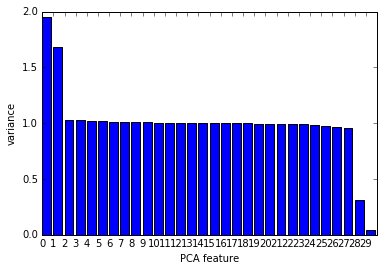

In [6]:
# Fit the pipeline to 'samples'
pipeline.fit(X_train)#(pd.merge(X_train,pd.DataFrame(y_train),left_index=True,right_index=True))

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Fitting PCA for test dataset

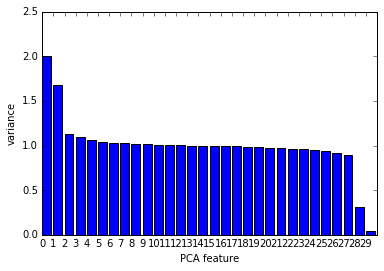

In [7]:
# Fit the pipeline to 'samples'
pipeline.fit(X_test)#(pd.merge(X_train,pd.DataFrame(y_train),left_index=True,right_index=True))

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Since 27 of the 29 dimensions are intrinsic we wouldn't save much time by reducing them. If we did reduce them though, this is what it would look like. 

In [8]:
pca = PCA(n_components = 27)
pca_Xtrain = pca.fit_transform(X_train)
pca_Xtest = pca.fit_transform(X_test)
pca_Xtrain.shape

(213605, 27)